# Load Dependencies

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


# Load Dataset

In [ ]:
df = pd.read_csv('/content/final_dataset.csv')

In [ ]:
df.shape

(184, 39378)

# Data Preprocessing

In [ ]:
def normalize_data(x):
    norm_data = (x - x.min()) / (x.max() - x.min())
    return norm_data


normalized_cols = df.apply(normalize_data)

In [ ]:
df_norm = pd.DataFrame(normalized_cols, columns=df.columns)
df_norm

,Unnamed: 0,DDX11L1,WASH7P,MIR6859-1,MIR1302-2HG,MIR1302-2,FAM138A,OR4F5,LOC100996442,LOC729737,...,ND5,ND6,TRNE,CYTB,TRNT,TRNP,TRNAV-CAC_1,TRNAV-CAC_2,TRNAV-CAC_3,Outcomes
0,0.000000,0.052632,0.025714,0.000000,0.0,0.0,0.000000,0.111111,0.033654,0.005690,...,0.049272,0.059509,0.010630,0.089519,0.002199,0.016083,0.000000,0.000000,0.000000,0.0
1,0.005464,0.000000,0.010000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.005690,...,0.026352,0.030294,0.004700,0.088908,0.003722,0.024431,0.000000,0.000000,0.000000,0.0
2,0.010929,0.105263,0.552857,0.203704,0.0,0.0,0.166667,0.000000,0.088942,0.029872,...,0.193996,0.225911,0.035781,0.233961,0.015903,0.050777,0.000000,0.000000,0.000000,0.0
3,0.016393,0.000000,0.018571,0.000000,0.0,0.0,0.166667,0.000000,0.043269,0.025320,...,0.037531,0.051564,0.006750,0.125402,0.006936,0.022083,0.000000,0.000000,0.000000,0.0
4,0.021858,0.052632,0.591429,0.074074,0.0,0.0,0.166667,0.111111,0.146635,0.060597,...,0.190006,0.226445,0.025624,0.231630,0.015733,0.035996,0.000000,0.000000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179,0.978142,0.052632,0.571429,0.129630,0.0,0.0,0.166667,0.000000,0.115385,0.044666,...,0.192061,0.226170,0.030850,0.232830,0.015733,0.043604,0.000000,0.000000,0.000000,0.0
180,0.983607,0.421053,0.148571,0.092593,0.0,0.0,0.000000,0.000000,0.093750,0.011664,...,0.015181,0.007967,0.283589,0.013909,0.220775,0.145465,0.623494,0.724138,0.688742,0.0
181,0.989071,0.263158,0.117143,0.055556,0.0,0.0,0.000000,0.000000,0.093750,0.011095,...,0.006379,0.003017,0.362248,0.005364,0.186432,0.089939,0.310241,0.413793,0.278146,0.0
182,0.994536,0.105263,0.155714,0.018519,0.0,0.0,0.000000,0.000000,0.079327,0.009673,...,0.018038,0.010104,0.481757,0.041284,0.705464,0.535115,0.409639,0.241379,0.000000,0.0


In [ ]:
df_norm.columns

Index(['Unnamed: 0', 'DDX11L1', 'WASH7P', 'MIR6859-1', 'MIR1302-2HG',
       'MIR1302-2', 'FAM138A', 'OR4F5', 'LOC100996442', 'LOC729737',
       ...
       'ND5', 'ND6', 'TRNE', 'CYTB', 'TRNT', 'TRNP', 'TRNAV-CAC_1',
       'TRNAV-CAC_2', 'TRNAV-CAC_3', 'Outcomes'],
      dtype='object', length=39378)

# Split Dataset
train_test_split(): method is splitting dataset in 2 parts.

*   X -> input features
*   Y -> Output features
*   test_size: define splitting ratio. (9.2 means test data will be 20% and train data will be 80%)
*   stratify: stratify define to split data of each class equally.

*   random_state: control to random splitting.



In [ ]:
X = df.drop(['Outcomes', 'Unnamed: 0'], axis=1)
Y = df['Outcomes']
print(X.shape)
print(Y.shape)

(184, 39376)
(184,)


In [ ]:
correlations = X.corrwith(Y)
selected_features = correlations[abs(correlations) >= 0.50].index
X = X[selected_features]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=42)
print(X_train.shape)
print(X_test.shape)

(147, 4707)
(37, 4707)


In [ ]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

logreg.fit(X_train, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
y_pred = logreg.predict([X.iloc[0]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [ ]:
# Step 6: Evaluate Model (Optional)
from sklearn.metrics import accuracy_score

log_y_pred = logreg.predict(X_test)
accuracy = accuracy_score(y_test, log_y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9459459459459459


In [ ]:
# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, log_y_pred)

# Calculate precision and recall
precision = precision_score(y_test, log_y_pred, average='macro')
recall = recall_score(y_test, log_y_pred, average='macro')

print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")


Confusion Matrix:
[[19  0]
 [ 2 16]]
Precision: 0.95
Recall: 0.94


In [ ]:
encoding = {0 : 'Normal', 1: 'Cancer'}

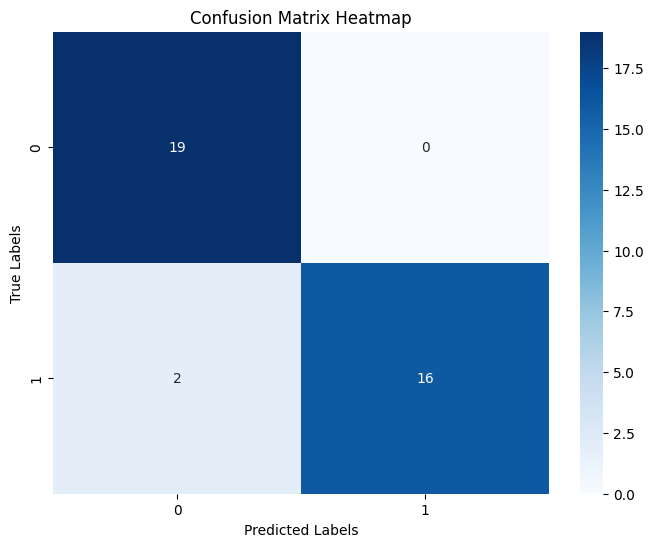

In [ ]:
import seaborn as sns
# Draw the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=encoding, yticklabels=encoding)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap')
plt.show()

## SVM

In [ ]:
from sklearn.svm import SVC
svm_model = SVC(kernel='linear')  # You can use different kernels like 'linear', 'rbf', etc.

# Train the SVM model
svm_model.fit(X_train, y_train)

# Make predictions
svm_y_pred = svm_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, svm_y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 94.59%


In [ ]:
# Compute the confusion matrix
svm_conf_matrix = confusion_matrix(y_test, svm_y_pred)

# Calculate precision and recall
precision = precision_score(y_test, svm_y_pred, average='macro')
recall = recall_score(y_test, svm_y_pred, average='macro')

print(f"Confusion Matrix:\n{svm_conf_matrix}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")


Confusion Matrix:
[[19  0]
 [ 2 16]]
Precision: 0.95
Recall: 0.94


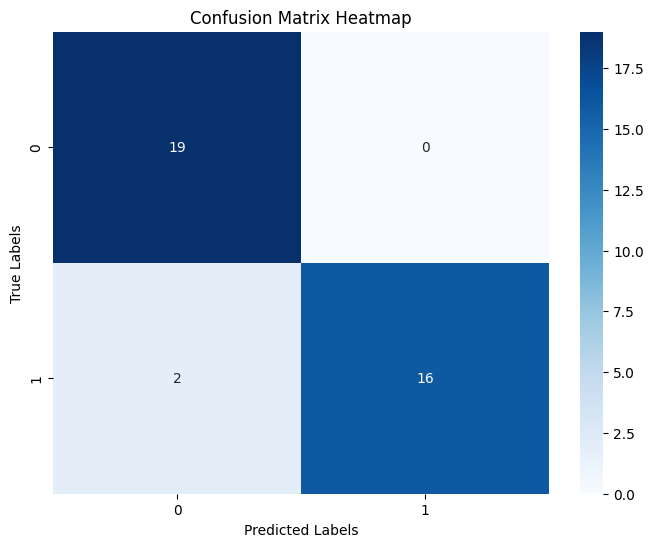

In [ ]:
import seaborn as sns
# Draw the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(svm_conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=encoding, yticklabels=encoding)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap')
plt.show()

## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest classifier
rf_model = RandomForestClassifier(n_estimators=10, random_state=42, max_depth=5)

# Train the Random Forest model
rf_model.fit(X_train, y_train)

# Make predictions
rf_y_pred = rf_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, rf_y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 97.30%


In [ ]:
# Compute the confusion matrix
rf_conf_matrix = confusion_matrix(y_test, rf_y_pred)

# Calculate precision and recall
precision = precision_score(y_test, rf_y_pred, average='macro')
recall = recall_score(y_test, rf_y_pred, average='macro')

print(f"Confusion Matrix:\n{rf_y_pred}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")


Confusion Matrix:
[0 0 0 0 1 0 1 1 0 0 0 0 0 0 1 1 0 1 1 0 0 1 0 0 1 1 0 1 0 0 0 1 1 1 1 1 1]
Precision: 0.97
Recall: 0.97


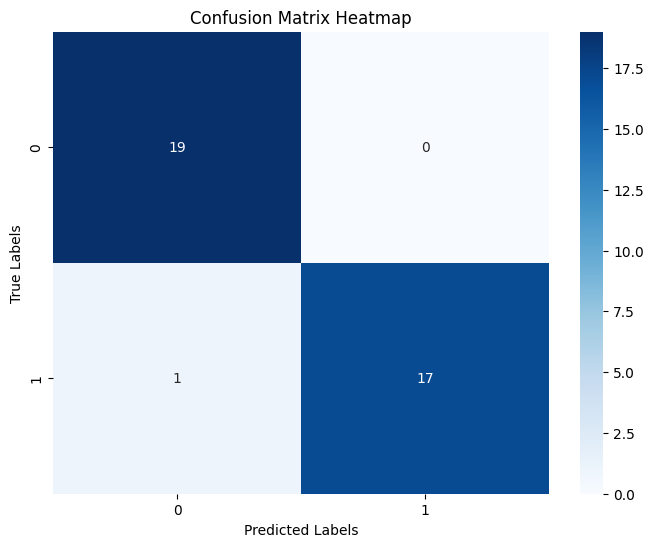

In [ ]:
import seaborn as sns
# Draw the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(rf_conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=encoding, yticklabels=encoding)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap')
plt.show()